# Stock Price Prediction Using Machine Learning

## Getting Data and First Looking

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install yfinance

In [10]:
# Paketi import ediyoruz.
import yfinance as yf
 
# Hangi tarihler olduğunu seçiyoruz.
start_date = '2020-01-01'
end_date = '2022-10-6'
 
# Hangi verisini çekeceğimizi belirliyoruz.
ticker = 'GOOGL'
 
# Veriyi alıyoruz.
data = yf.download(ticker, start_date, end_date)

# Son 5 günün verisi :
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2022-09-29 00:00:00-04:00   98.639999   98.639999   95.959999   97.419998   
2022-09-30 00:00:00-04:00   97.050003   98.900002   95.559998   95.650002   
2022-10-03 00:00:00-04:00   96.760002   99.290001   96.519997   98.639999   
2022-10-04 00:00:00-04:00  100.440002  101.839996  100.379997  101.639999   
2022-10-05 00:00:00-04:00   99.830002  101.930000   98.800003  101.430000   

                            Adj Close    Volume  
Date                                             
2022-09-29 00:00:00-04:00   97.419998  31047200  
2022-09-30 00:00:00-04:00   95.650002  32910100  
2022-10-03 00:00:00-04:00   98.639999  27982000  
2022-10-04 00:00:00-04:00  101.639999  28850800  
2022-10-05 00:00:00-04:00  101.430000  22176900  


In [11]:
data.shape

(696, 6)

In [12]:
df = pd.DataFrame(data)

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...
2022-09-29 00:00:00-04:00,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
2022-09-30 00:00:00-04:00,97.050003,98.900002,95.559998,95.650002,95.650002,32910100
2022-10-03 00:00:00-04:00,96.760002,99.290001,96.519997,98.639999,98.639999,27982000


In [8]:
df.index

DatetimeIndex(['2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               ...
               '2022-09-22 00:00:00-04:00', '2022-09-23 00:00:00-04:00',
               '2022-09-26 00:00:00-04:00', '2022-09-27 00:00:00-04:00',
               '2022-09-28 00:00:00-04:00', '2022-09-29 00:00:00-04:00',
               '2022-09-30 00:00:00-04:00', '2022-10-03 00:00:00-04:00',
               '2022-10-04 00:00:00-04:00', '2022-10-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=696, freq=None)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,696.0,1.050583e+02,2.748902e+01,5.281850e+01,7.634650e+01,1.084775e+02,1.307728e+02,1.512500e+02
High,696.0,1.062635e+02,2.760457e+01,5.334550e+01,7.776275e+01,1.107950e+02,1.321145e+02,1.515465e+02
Low,696.0,1.038388e+02,2.723866e+01,5.044350e+01,7.557225e+01,1.070300e+02,1.277844e+02,1.488990e+02
Close,696.0,1.050766e+02,2.739923e+01,5.270650e+01,7.628775e+01,1.089240e+02,1.298278e+02,1.498385e+02
Adj Close,696.0,1.050766e+02,2.739923e+01,5.270650e+01,7.628775e+01,1.089240e+02,1.298278e+02,1.498385e+02
Volume,696.0,3.534782e+07,1.568067e+07,9.312000e+06,2.513400e+07,3.155600e+07,4.038300e+07,1.232000e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 2020-01-02 00:00:00-05:00 to 2022-10-05 00:00:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       696 non-null    float64
 1   High       696 non-null    float64
 2   Low        696 non-null    float64
 3   Close      696 non-null    float64
 4   Adj Close  696 non-null    float64
 5   Volume     696 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.1 KB


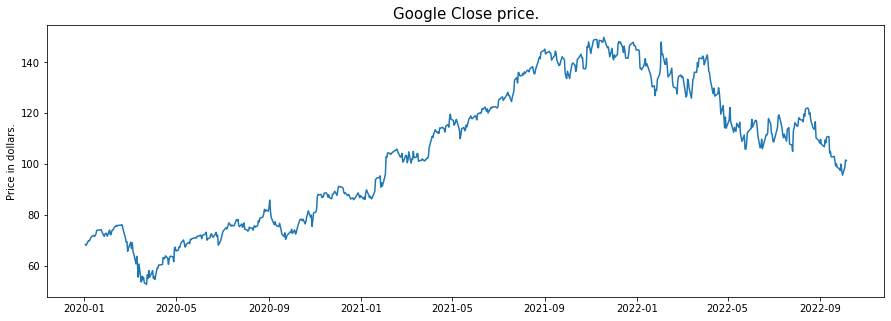

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Google Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

## Data Manipulation

In [15]:
df = df.reset_index()

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
1,2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2,2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
3,2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
4,2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...,...
691,2022-09-29 00:00:00-04:00,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
692,2022-09-30 00:00:00-04:00,97.050003,98.900002,95.559998,95.650002,95.650002,32910100
693,2022-10-03 00:00:00-04:00,96.760002,99.290001,96.519997,98.639999,98.639999,27982000
694,2022-10-04 00:00:00-04:00,100.440002,101.839996,100.379997,101.639999,101.639999,28850800


In [22]:
df.columns = df.columns.str.lower()

In [23]:
df

,date,open,high,low,close,adj close,volume
0,2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
1,2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2,2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
3,2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
4,2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...,...
691,2022-09-29 00:00:00-04:00,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
692,2022-09-30 00:00:00-04:00,97.050003,98.900002,95.559998,95.650002,95.650002,32910100
693,2022-10-03 00:00:00-04:00,96.760002,99.290001,96.519997,98.639999,98.639999,27982000
694,2022-10-04 00:00:00-04:00,100.440002,101.839996,100.379997,101.639999,101.639999,28850800
